In [1]:
import tensorflow as tf

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model

In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
x_train, x_test=x_train/255.0, x_test/255.0

In [9]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train=np.expand_dims(x_train,-1)

In [33]:
x_train[0].shape

(28, 28, 1)

In [26]:
x_train[0][0][0]

array([0.])

In [27]:
x_test=np.expand_dims(x_test,-1)

In [28]:
x_test.shape

(10000, 28, 28, 1)

In [29]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [32]:
K= len(set(y_train))
print("No. of classes: ",K)

No. of classes:  10


In [35]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model=Model(i, x)

In [36]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
r=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 158us/sample - loss: 0.5222 - accuracy: 0.8058 - val_loss: 0.4038 - val_accuracy: 0.8492
Epoch 2/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3586 - accuracy: 0.8651 - val_loss: 0.3553 - val_accuracy: 0.8653
Epoch 3/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3103 - accuracy: 0.8820 - val_loss: 0.3198 - val_accuracy: 0.8796
Epoch 4/15
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2778 - accuracy: 0.8954 - val_loss: 0.2991 - val_accuracy: 0.8898
Epoch 5/15
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2539 - accuracy: 0.9043 - val_loss: 0.3040 - val_accuracy: 0.8862
Epoch 6/15
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2330 - accuracy: 0.9115 - val_loss: 0.2964 - val_accuracy: 0.8904
Epoch 7/15
60000/60000 [=============================

In [41]:
print("Training result: ", model.evaluate(x_train,y_train))
print("Testing result: ", model.evaluate(x_test,y_test))

60000/60000 [==============================] - 3s 53us/sample - loss: 0.0772 - accuracy: 0.9715
Training result:  [0.07717045631588747, 0.97146666]
10000/10000 [==============================] - 1s 59us/sample - loss: 0.3742 - accuracy: 0.9002
Testing result:  [0.3742361698448658, 0.9002]


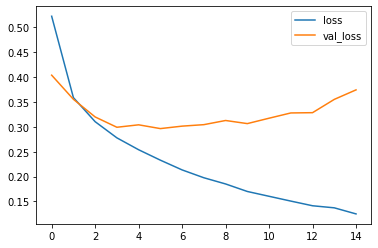

In [42]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

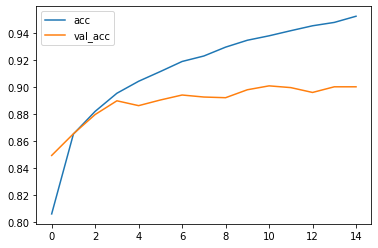

In [43]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [ ]:
pred=model.predict(x_test)

Confusion matrix, without normalization
[[874   0  15  11   2   2  90   0   6   0]
 [  2 978   0  10   6   0   3   0   1   0]
 [ 17   0 863   9  45   0  64   0   2   0]
 [ 15   9  23 884  45   1  20   0   3   0]
 [  1   0  78  12 829   0  79   0   1   0]
 [  1   1   0   1   0 973   0  18   0   6]
 [113   1  70  17  91   1 696   0  11   0]
 [  0   0   0   0   0   8   0 968   0  24]
 [  2   1   4   2   5   3   4   2 976   1]
 [  0   0   0   0   0   5   1  33   0 961]]


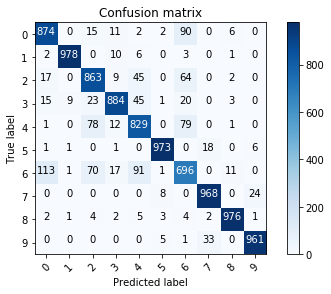

In [44]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

In [45]:
labels='''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

In [46]:
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle',
 'boot']

In [47]:
p_test=model.predict(x_test)

In [61]:
p_test=p_test.argmax(axis=1)

In [63]:
misclassified_idx=np.where(p_test!=y_test)[0]

Text(0.5, 1.0, 'True label: Pullover, Predicted label: Coat')

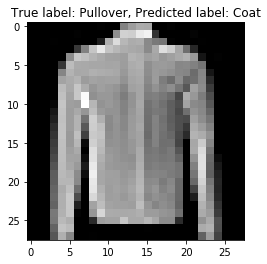

In [88]:
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s, Predicted label: %s" %(labels[y_test[i]], labels[p_test[i]]))